---


<img width=25% src="https://raw.githubusercontent.com/gabrielcapela/Credit-Card-Fraud-Detection-/main/images/myself.png" align=right>

# **Wine Demand Forecast Project**

*by Gabriel Capela*

[<img src="https://img.shields.io/badge/LinkedIn-0077B5?style=for-the-badge&logo=linkedin&logoColor=white"/>](https://www.linkedin.com/in/gabrielcapela)
[<img src="https://img.shields.io/badge/Medium-12100E?style=for-the-badge&logo=medium&logoColor=white" />](https://medium.com/@gabrielcapela)

---
This project aims to predict daily wine sales in a store, using historical data to identify seasonal patterns and consumption trends. By implementing a forecasting model, it is possible to optimize inventory management, avoid shortages and excesses of products, and plan strategic actions, such as promotional campaigns and efficient replenishment.
<p align="center">
<img width=50% src="https://github.com/gabrielcapela/AutoML_Forecast/blob/4780308630af334c14542f39063a10888467740e/images/oscar-nord-W4Gwb-xz_fA-unsplash.jpg?raw=true">
</p>

The purpose of this project is to apply **Automated Machine Learning**, in order to demonstrate the practicality of this type of tool.

# Business Understanding 🍷 📊 

**Wine** is one of the most traditional and appreciated beverages in the world, present in many cultures and on special occasions. Its consumption goes beyond the simple act of drinking; it is linked to history, gastronomy and the celebration of important moments. There is a huge diversity of wines, varying according to the grape used, the region of production and the fermentation process. Red, white, rosé and sparkling wines have distinct characteristics that influence their gastronomic combinations and consumer preferences. Factors such as vintage, alcohol content and aging time also play a crucial role in the choice, making the wine market dynamic and subject to seasonal variations.

**The demand for wine is not constant** throughout the year, being strongly influenced by commemorative dates and seasonal events. End-of-year celebrations, such as Christmas and New Year's Eve, significantly boost sales of sparkling wines and more sophisticated wines, due to the celebrations and festive dinners. On Valentine's Day, rosé and white wines become more popular, accompanying romantic dinners. Other dates, such as Easter, Mother's Day and regional holidays, also increase demand, as do local events, such as wine fairs and tastings, which promote a temporary increase in consumption. In addition, external factors such as temperature and market trends directly influence sales. In the summer, for example, the demand for refreshing wines increases, while in the winter, full-bodied reds gain prominence.

Given these variations, **forecasting demand is essential to optimize inventory management and improve a store's operational efficiency**. Accurate forecasting prevents both product shortages, which can lead to lost sales and customer dissatisfaction, and excess, which results in unnecessary storage costs and the risk of waste. In addition, it allows purchases to be made in a planned manner, ensuring that the right products are available at times of greatest demand. With this, the company can structure more strategic promotional campaigns, adjust the sales team according to demand and make more informed decisions about product replenishment.

To achieve this level of predictability, a demand forecasting model can be implemented. Using historical sales data, the model can identify seasonal patterns and trends over time, allowing for more accurate projections of future demand. **Statistical methods and machine learning techniques, such as Prophet,** are able to capture complex variations and generate forecasts tailored to the store’s needs. These forecasts become a competitive differentiator, helping the company to better prepare for market fluctuations, avoid stockouts and, consequently, maximize sales and customer satisfaction.

# Data Understanding 🗂

In our study, we have **two distinct data sets**. The first contains **detailed information about each wine**, including name, country of origin and price. The second table records the **sales history**, specifying, for each combination of day, store and product, the number of bottles sold.

Below are the links to access each table:

[Product data (wines)](https://github.com/gabrielcapela/AutoML_Forecast/raw/c48dc5bc6b8139ff6a8b7f7b310ab0daea27a8e3/products.csv)

[Sales data](https://github.com/gabrielcapela/AutoML_Forecast/raw/c48dc5bc6b8139ff6a8b7f7b310ab0daea27a8e3/sales-clean.csv)

This data was generated artificially, with the aim of applying an AutoML model and illustrating the solution to a problemreal.

## Obtaining and Summary Analysis of Data

Let's start by importing the data and previewing the first few rows to illustrate the meaning of each column:

### Wine data

In [23]:
# Importing the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [24]:
# Importing the dataset
df_wines = pd.read_csv('https://raw.githubusercontent.com/gabrielcapela/AutoML_Forecast/refs/heads/main/products.csv')
#Showing the first 5 lines
print(f"The data about the wines has {df_wines.shape[0]} rows and {df_wines.shape[1]} variables")
df_wines.head()

The data about the wines has 219 rows and 9 variables


,item_id,name,producer,country,region,vintage,kind,price_brl,price_usd
0,1,Philipponnat Royale Reserve Brut,Philipponat,France,Champagne,NV,sparkling,339.60,58.75
1,2,Philipponnat Royale Reserve Rosé,Philipponat,France,Champagne,NV,rose sparkling,489.00,84.60
2,3,Philipponnat Cuvée 1522 Grand Cru Extra Brut,Philipponat,France,Champagne,2009,sparkling,789.00,136.51
3,4,Philipponnat Cuvée 1522 1er Cru Rosé,Philipponat,France,Champagne,2008,rose sparkling,899.40,155.61
4,5,Philipponnat Clos Des Goisses Brut,Philipponat,France,Champagne,2009,sparkling,"1,548.00",267.82


In [25]:
# Check the data types of each column
print(df_wines.dtypes)

item_id       int64
name         object
producer     object
country      object
region       object
vintage      object
kind         object
price_brl    object
price_usd    object
dtype: object


Below is the meaning of each variable:

*   **item_id**: Unique identifier for each wine.

*   **name**: Name of the wine, including brand and specific label.

*   **producer**: The winery or company that produces the wine.

*   **country**: Country where the wine is produced.

*   **region**: Specific wine-producing region within the country.

*   **vintage**: Year the grapes were harvested (if "NV," it means "Non-Vintage," blending grapes from multiple years).

*   **kind**: Type of wine (e.g., sparkling, red, white, rosé).

*   **price_brl**: Price of the wine in Brazilian reais (BRL).

*   **price_usd**: Price of the wine in US dollars (USD).

#### Converting the type of **price_usd** column

In [26]:
# Replace commas with dots and convert the 'price_usd' column to float
df_wines['price_usd'] = df_wines['price_usd'].str.replace(',', '').astype(float)

# Check the data types of each column
print(df_wines.dtypes)

item_id        int64
name          object
producer      object
country       object
region        object
vintage       object
kind          object
price_brl     object
price_usd    float64
dtype: object


#### Deleting the **price_brl** column

The **price_brl** column will be deleted, since the exchange rate between Reais and Dollars is not constant, it is better to work with only one currency.

In [27]:
#Deleting the 'price_brl' column
df_wines = df_wines.drop(columns=['price_brl'])
#Checking the first 5 lines
df_wines.head()

,item_id,name,producer,country,region,vintage,kind,price_usd
0,1,Philipponnat Royale Reserve Brut,Philipponat,France,Champagne,NV,sparkling,58.75
1,2,Philipponnat Royale Reserve Rosé,Philipponat,France,Champagne,NV,rose sparkling,84.60
2,3,Philipponnat Cuvée 1522 Grand Cru Extra Brut,Philipponat,France,Champagne,2009,sparkling,136.51
3,4,Philipponnat Cuvée 1522 1er Cru Rosé,Philipponat,France,Champagne,2008,rose sparkling,155.61
4,5,Philipponnat Clos Des Goisses Brut,Philipponat,France,Champagne,2009,sparkling,267.82


### Sales data

In [28]:
# Importing the dataset
df_sales = pd.read_csv('https://raw.githubusercontent.com/gabrielcapela/AutoML_Forecast/refs/heads/main/sales-clean.csv')
#Showing the first 5 lines
print(f"The data about the sales has {df_sales.shape[0]} rows and {df_sales.shape[1]} variables")
df_sales.head()

The data about the sales has 720071 rows and 4 variables


,date,store,item,sales
0,2018-01-01,1,1,13
1,2018-01-02,1,1,11
2,2018-01-03,1,1,14
3,2018-01-04,1,1,13
4,2018-01-05,1,1,10


In [29]:
# Check the data types of each column
print(df_sales.dtypes)

date     object
store     int64
item      int64
sales     int64
dtype: object


#### Converting the date column

In [37]:
# Ensure the 'date' column is properly converted regardless of the format
df_sales['date'] = pd.to_datetime(df_sales['date'], format='mixed')

# Check the result
print(df_sales.dtypes)  # The 'date' column should be datetime64[ns]
print(df_sales.head())  # Display the first few rows

date     datetime64[ns]
store             int64
item              int64
sales             int64
dtype: object
        date  store  item  sales
0 2018-01-01      1     1     13
1 2018-01-02      1     1     11
2 2018-01-03      1     1     14
3 2018-01-04      1     1     13
4 2018-01-05      1     1     10


Below is the meaning of each variable:

*   **date**: The date of the sale, formatted as YYYY-MM-DD.

*   **store**: The unique identifier of the store where the sale took place.

*   **item**: The unique identifier of the wine being sold, corresponding to the product list.

*   **sales**: The number of bottles sold for the given item and store on that specific date.


## YData Profiling

In order to explore AutoML tools, I will be using **Pandas Profiling**, which is a powerful tool that automates exploratory data analysis (EDA) and makes it easy to visualize and understand the characteristics of a dataset. With the ability to **generate interactive reports in HTML** format, it provides detailed insights into each variable, such as distributions, missing values, and outliers.

The report generated by ydata will provide a summary analysis that will be complemented by code

### Wines report

In [50]:
from ydata_profiling import ProfileReport

# Converting the columns to the category type in order to extract more information
df_wines["producer"] = df_wines["producer"].astype("category")
df_wines["name"] = df_wines["name"].astype("category")
df_wines["kind"] = df_wines["kind"].astype("category")
df_wines["region"] = df_wines["region"].astype("category")
df_wines["country"] = df_wines["country"].astype("category")
df_wines["vintage"] = df_wines["vintage"].astype("category")  

# Creating the report
profile = ProfileReport(df_wines, title="Wines report", explorative=True)

# Transforming to html format
profile.to_file("report_wines.html")

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 68.50it/s]


Click [**HERE**](https://gabrielcapela.github.io/demand_forecast/report_wines.html) to see the report.

**Some observations** can already be made:


*   There are **no missing values** ​​in the dataset;

*   There is correlation between **producer, country of origin, region and type of wine**;

*   We have **58** different wine **producers**;

*   The wine prices range from $9 to $1901, with an average price of $164.4;

*   The wines come from **6 different countries**: 

   <img width=50% src="https://github.com/gabrielcapela/AutoML_Forecast/blob/4780308630af334c14542f39063a10888467740e/images/country_plot.png?raw=true">
</p>

* There are **5 different types of wine**: Red, White, Sparkling, Rose and Rose Sparkling.

<img width=50% src="https://github.com/gabrielcapela/AutoML_Forecast/blob/6887f663a31b75bbf8d5e487682a134dc793eb48/images/kind_plot.png?raw=true">

#### Checking the price between categories

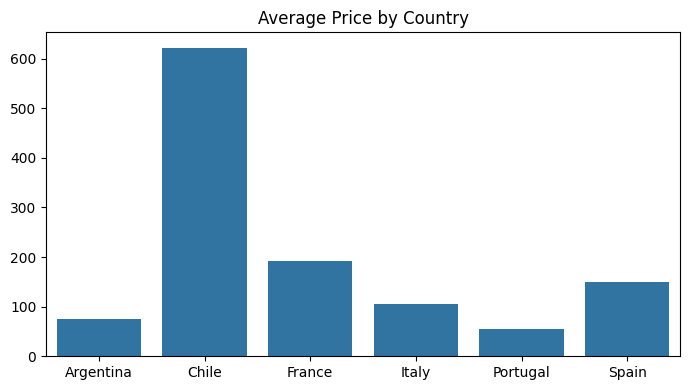

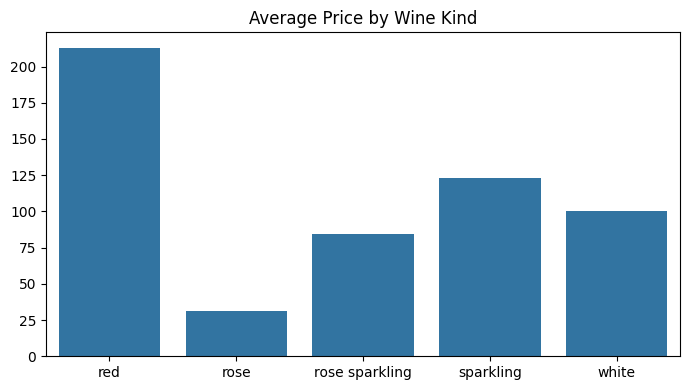

In [68]:
%matplotlib inline
import seaborn as sns

# Calculate the average wine price by 'country' and 'kind'
df_country_avg = df_wines.groupby('country')['price_usd'].mean().reset_index()
df_kind_avg = df_wines.groupby('kind')['price_usd'].mean().reset_index()

# Bar plot for 'country'
plt.figure(figsize=(7, 4))  # Adjust the figure size if needed
sns.barplot(x='country', y='price_usd', data=df_country_avg)
plt.title("Average Price by Country")  
plt.ylabel('')  
plt.xlabel('')  
plt.tight_layout()  # Adjust the layout to avoid label overlap
plt.show()

# Bar plot for 'kind'
plt.figure(figsize=(7, 4))  
sns.barplot(x='kind', y='price_usd', data=df_kind_avg)
plt.title("Average Price by Wine Kind")  
plt.ylabel('')  
plt.xlabel('')  
plt.tight_layout() 
plt.show()


*   Red wines are the most **expensive** (and the ones with the highest number of bottles);

*   **Chile has the highest average price**, but only has one wine;


### Sales report

In [51]:
import warnings
from pandas_profiling import ProfileReport

# Ignore all warnings
warnings.filterwarnings('ignore')

# Creating the report
profile = ProfileReport(df_sales, tsmode=True, sortby="date", title="Time-Series Sales report", explorative=True)

# Transforming to html format
profile.to_file("report_sales.html")

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 124.39it/s]


Click [**HERE**](https://gabrielcapela.github.io/demand_forecast/report_sales.html) to see the report.

**Some observations**:


*   There are **no missing values** ​​in the dataset;

*   The maximum quantity of a product sold in a store, per day, is 70.5.

#### Checking the sales between stores

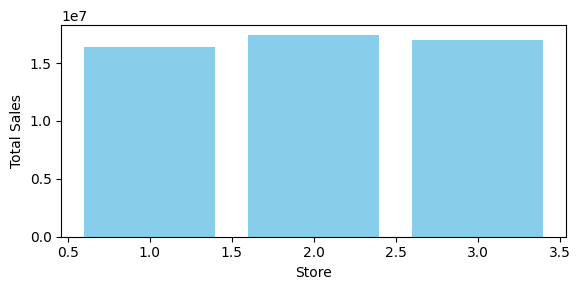

In [71]:
# Group by 'store' and sum the sales
sales_by_store = df_sales.groupby('store')['sales'].sum().reset_index()

# Plot the bar chart
plt.figure(figsize=(6, 3))
plt.bar(sales_by_store['store'], sales_by_store['sales'], color='skyblue')

plt.xlabel('Store')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()

*   Sales are **evenly distributed** across stores.

### Relating the two tables

#### Checking the best-selling wine

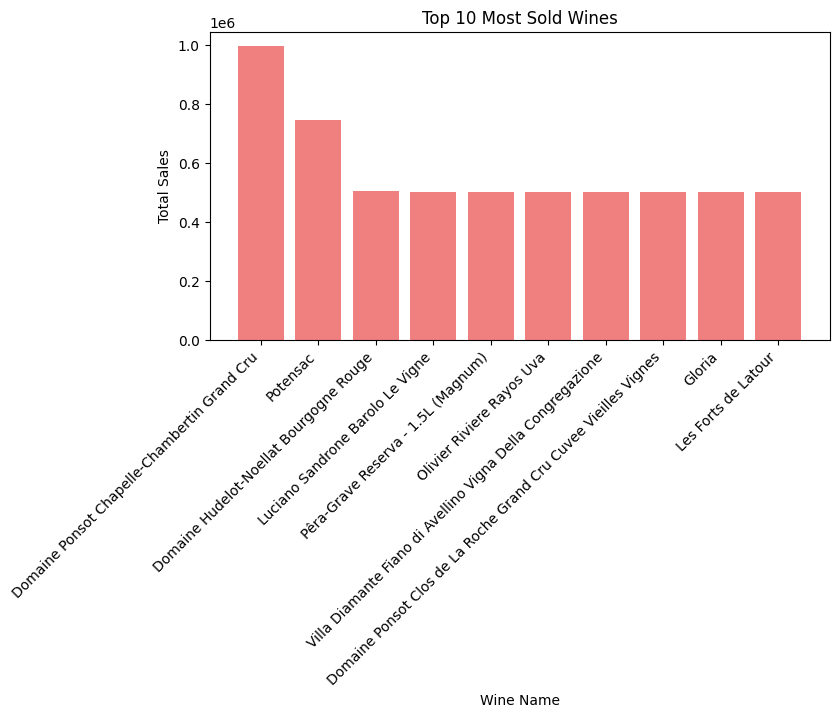

Top 3 Most Sold Wines:
81. Domaine Ponsot Chapelle-Chambertin Grand Cru with 994482 sales
165. Potensac with 743685 sales
61. Domaine Hudelot-Noellat Bourgogne Rouge with 502896 sales


In [83]:
# Merging the two dataframes on the correct item column
merged_df = pd.merge(df_sales, df_wines[['item_id', 'name']], left_on='item', right_on='item_id', how='inner')

# Grouping by wine name and summing the total sales
sales_by_wine = merged_df.groupby('name')['sales'].sum().reset_index()

# Sorting the wines by total sales in descending order
sales_by_wine = sales_by_wine.sort_values(by='sales', ascending=False)

# Plotting the top 10 most sold wines
top_10_wines = sales_by_wine.head(10)

plt.figure(figsize=(8, 4))
plt.bar(top_10_wines['name'], top_10_wines['sales'], color='lightcoral')

plt.title('Top 10 Most Sold Wines')
plt.xlabel('Wine Name')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# Printing the names of the top 3 most sold wines
top_3_wines = top_10_wines.head(3)
print("Top 3 Most Sold Wines:")
for i, row in top_3_wines.iterrows():
    print(f"{i+1}. {row['name']} with {row['sales']} sales")

#### Checking the amount of sales by country of origin

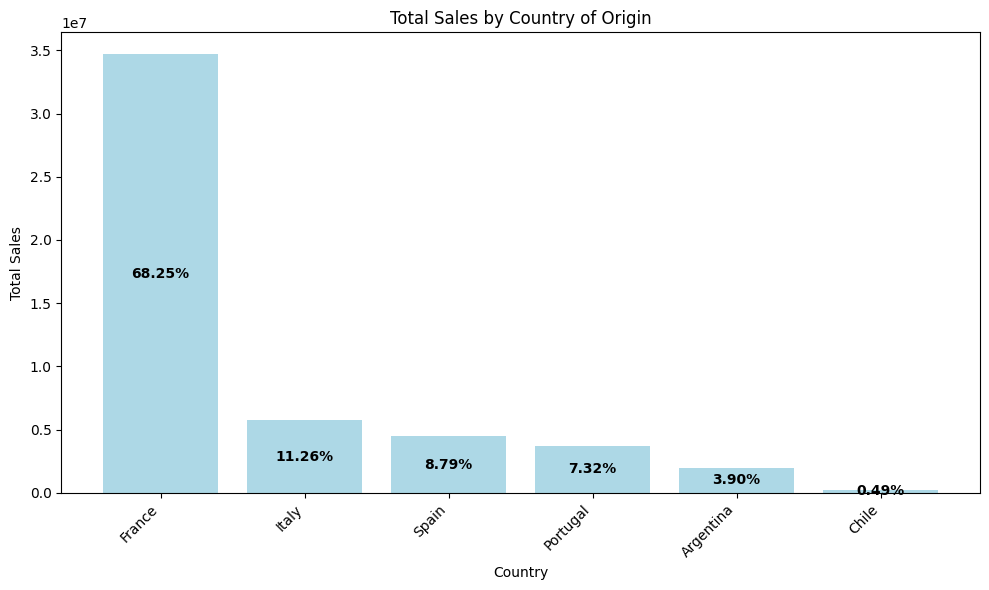

In [86]:
# Merging df_sales with df_wines based on item_id (or item in df_sales)
merged_df = df_sales.merge(df_wines[['item_id', 'country']], how='left', left_on='item', right_on='item_id')

# Grouping the sales by country of origin and summing the sales
sales_by_country = merged_df.groupby('country')['sales'].sum().reset_index()

# Calculating the percentage of total sales for each country
total_sales = sales_by_country['sales'].sum()
sales_by_country['percentage'] = (sales_by_country['sales'] / total_sales) * 100

# Sorting the countries by total sales in descending order
sales_by_country = sales_by_country.sort_values(by='sales', ascending=False)

# Plotting the sales by country
plt.figure(figsize=(10, 6))
bars = plt.bar(sales_by_country['country'], sales_by_country['sales'], color='lightblue')

# Adding the percentage inside the bars
for bar, percentage in zip(bars, sales_by_country['percentage']):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height / 2, f'{percentage:.2f}%', 
             ha='center', va='center', color='black', fontweight='bold')

plt.title('Total Sales by Country of Origin')
plt.xlabel('Country')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()




#### Checking the amount of sales by type of wine 

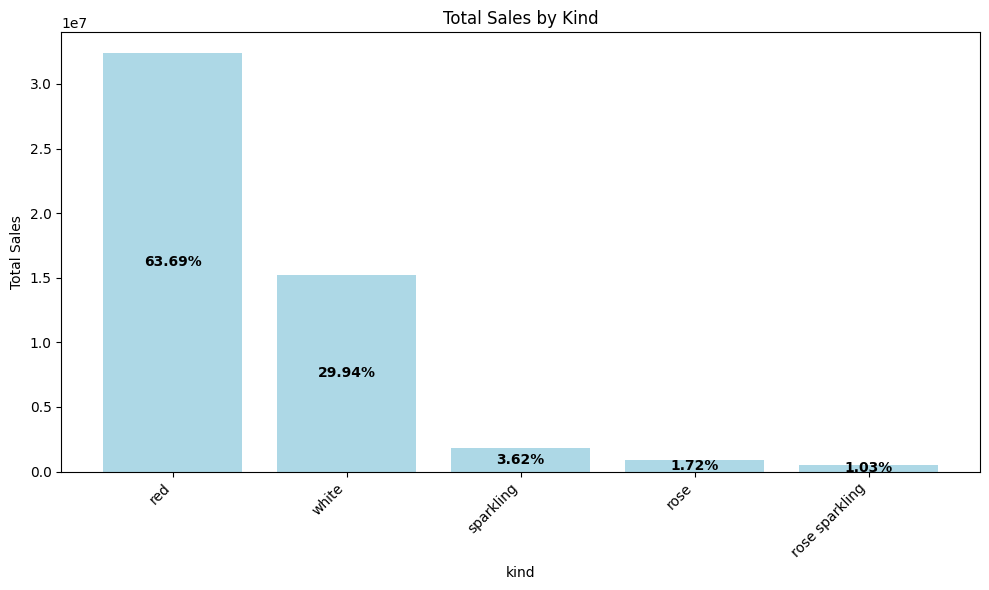

In [104]:
# Merging df_sales with df_wines based on item_id (or item in df_sales)
merged_df = df_sales.merge(df_wines[['item_id', 'kind']], how='left', left_on='item', right_on='item_id')

# Grouping the sales by kind and summing the sales
sales_by_kind = merged_df.groupby('kind')['sales'].sum().reset_index()

# Calculating the percentage of total sales for each kind
total_sales = sales_by_kind['sales'].sum()
sales_by_kind['percentage'] = (sales_by_kind['sales'] / total_sales) * 100

# Sorting the kind by total sales in descending order
sales_by_kind = sales_by_kind.sort_values(by='sales', ascending=False)

# Plotting the sales by country
plt.figure(figsize=(10, 6))
bars = plt.bar(sales_by_kind['kind'], sales_by_kind['sales'], color='lightblue')

# Adding the percentage inside the bars
for bar, percentage in zip(bars, sales_by_kind['percentage']):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height / 2, f'{percentage:.2f}%', 
             ha='center', va='center', color='black', fontweight='bold')

plt.title('Total Sales by Kind')
plt.xlabel('kind')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


*   Sales quantities are proportional to the quantity of different wines within each type.

# Data Preparation

# Modeling

# Evaluation